In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
craiglist = pd.read_excel("craiglist.xlsx")

Introduction:

We have scraped used car listings from Craiglists using python and we will be:

1. Data Cleaning
2. Data Transformation
3. EDA


In [3]:
craiglist.head()

,Column1,VIN,city,condition,cylinders,date time,drive,fuel,lat,long,...,pID,paint color,post_body,price,size,title status,transmission,type,year make model,year_c make model
0,0,NaN,dallas,NaN,NaN,2022-05-12 06;11,NaN,gas,32.960000,-96.838500,...,7.482630e+09,NaN,MOTOR V8 6 1 HEMI 432hp,200000,NaN,clean,manual,NaN,1970 plymouth road runner,1970 plymouth road runner
1,1,NaN,dallas,excellent,8 cylinders,2022-05-12 04;52,rwd,gas,36.357700,-94.222400,...,7.482622e+09,white,Perfect pearl 2002 SC hardtop convertible With...,20000,mid-size,clean,automatic,convertible,2002 Lexus SC430,2002 Lexus SC430
2,2,NaN,dallas,good,4 cylinders,2022-05-12 04;47,fwd,gas,33.025200,-96.195645,...,7.482621e+09,grey,2013 Honda Civic Sedan,11500,NaN,clean,automatic,sedan,2013 2013 Honda Civic sedan,2013 Honda Civic sedan
3,3,NaN,dallas,fair,NaN,2022-05-12 04;25,NaN,gas,33.427426,-94.150944,...,7.482620e+09,white,199K call,3300,NaN,clean,automatic,van,1995 ford van,1995 ford van
4,4,NaN,dallas,good,4 cylinders,2022-05-12 03;42,fwd,gas,33.215654,-96.749039,...,7.482618e+09,silver,107292 miles Clean Title,7000,mid-size,clean,automatic,sedan,2012 VW Jetta,2012 VW Jetta


In [4]:
craiglist.tail()

,Column1,VIN,city,condition,cylinders,date time,drive,fuel,lat,long,...,pID,paint color,post_body,price,size,title status,transmission,type,year make model,year_c make model
21450,21450,NaN,seattle,good,8 cylinders,2022-05-03 17;50,4wd,diesel,47.490041,-122.131319,...,7.479230e+09,grey,2003 Ford F 350 Diesel Lariat 4 x 4 6 0L,27500,full-size,clean,manual,pickup,2003 Ford F350,2003 Ford F350
21451,21451,NaN,seattle,good,NaN,2022-05-03 17;46,NaN,diesel,47.146400,-122.457200,...,7.479229e+09,white,I am selling my Chrysler 300 for 1600 and I am...,1650,NaN,clean,manual,NaN,2007 2007 chrysler 300,2007 chrysler 300
21452,21452,NaN,seattle,NaN,NaN,2022-05-03 17;41,NaN,gas,47.305000,-122.206700,...,7.479227e+09,NaN,I have for sale a 2012 tl all wheel drive v6 3...,15000,NaN,clean,automatic,NaN,2012 Acura TL,2012 Acura TL
21453,21453,NaN,seattle,NaN,NaN,2022-05-03 17;37,NaN,gas,47.988400,-122.200600,...,7.479226e+09,NaN,1993 GMC Sierra Single CAB Short Bed,13999,NaN,clean,automatic,NaN,1993 GMC Sierra,1993 GMC Sierra
21454,21454,NaN,seattle,NaN,NaN,2022-05-03 17;30,NaN,gas,47.611400,-122.330500,...,7.479224e+09,NaN,Selling out r 1984 Silverado long box classic ...,7500,NaN,clean,automatic,NaN,1984 chevy silverado,1984 chevy silverado


In [5]:
craiglist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21455 entries, 0 to 21454
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Column1            21455 non-null  int64  
 1   VIN                3331 non-null   object 
 2   city               21455 non-null  object 
 3   condition          17818 non-null  object 
 4   cylinders          16170 non-null  object 
 5   date time          21455 non-null  object 
 6   drive              14602 non-null  object 
 7   fuel               21455 non-null  object 
 8   lat                21443 non-null  float64
 9   long               21443 non-null  float64
 10  odometer           21455 non-null  int64  
 11  pID                21443 non-null  float64
 12  paint color        15540 non-null  object 
 13  post_body          21237 non-null  object 
 14  price              21455 non-null  int64  
 15  size               10787 non-null  object 
 16  title status       214

In [6]:
# Summary statistics for any numerical column:
craiglist.describe()

,Column1,lat,long,odometer,pID,price
count,21455.000000,21443.000000,21443.000000,2.145500e+04,2.144300e+04,2.145500e+04
mean,10727.000000,36.343634,-94.196912,1.452386e+05,7.479739e+09,1.694276e+04
std,6193.669349,5.853224,17.684743,3.235259e+05,2.647754e+06,1.112229e+05
min,0.000000,-83.256660,-124.185121,0.000000e+00,7.470651e+09,0.000000e+00
25%,5363.500000,32.934600,-112.037000,7.400000e+04,7.478395e+09,5.000000e+03
50%,10727.000000,36.003000,-88.192100,1.220000e+05,7.480553e+09,9.500000e+03
75%,16090.500000,40.727700,-77.595561,1.700000e+05,7.481719e+09,1.849300e+04
max,21454.000000,48.970800,135.961210,1.000000e+07,7.482635e+09,1.234568e+07


In total, we have 21455 rows with 20 columns in the dataset. As these columns at this point seems relevant, we will not be dropping any columns yet. The data types seems in the right order as well from a glance, we will double check on the column "date time" if it is in the right datetime format.

In [7]:
craiglist.loc[:,"date time"]

0        2022-05-12 06;11
1        2022-05-12 04;52
2        2022-05-12 04;47
3        2022-05-12 04;25
4        2022-05-12 03;42
               ...       
21450    2022-05-03 17;50
21451    2022-05-03 17;46
21452    2022-05-03 17;41
21453    2022-05-03 17;37
21454    2022-05-03 17;30
Name: date time, Length: 21455, dtype: object

It seems like the "date time" column is in the right data type as well.

In [8]:
percent_missing = craiglist.isnull().sum() * 100 / len(craiglist)
missing_value_df = pd.DataFrame({'Missing Values': craiglist.isna().sum(),
                                 'Percentage': round(percent_missing, 2)})
missing_value_df

,Missing Values,Percentage
Column1,0,0.00
VIN,18124,84.47
city,0,0.00
condition,3637,16.95
cylinders,5285,24.63
date time,0,0.00
drive,6853,31.94
fuel,0,0.00
lat,12,0.06
long,12,0.06


We may drop the variable VIN as it is missing more than 80% of the values out of the dataset

In [9]:
# sum(craiglist.isna().sum())

In [10]:
# To check the list of cities that we scraped from
pd.unique(craiglist["city"])

array(['dallas', 'chicago', 'newyork', 'sfbay', 'losangeles', 'houston',
       'phoenix', 'philadelphia', 'sanantonio', 'washingtondc', 'boston',
       'nashville', 'atlanta', 'miami', 'seattle'], dtype=object)

In [11]:
# Count how many listing per cities
craiglist[["city","date time"]].groupby(by=["city"]).count().sort_values("date time",ascending=False)

,date time
city,
newyork,1664
chicago,1660
houston,1643
atlanta,1607
dallas,1601
miami,1595
seattle,1577
losangeles,1556
washingtondc,1541


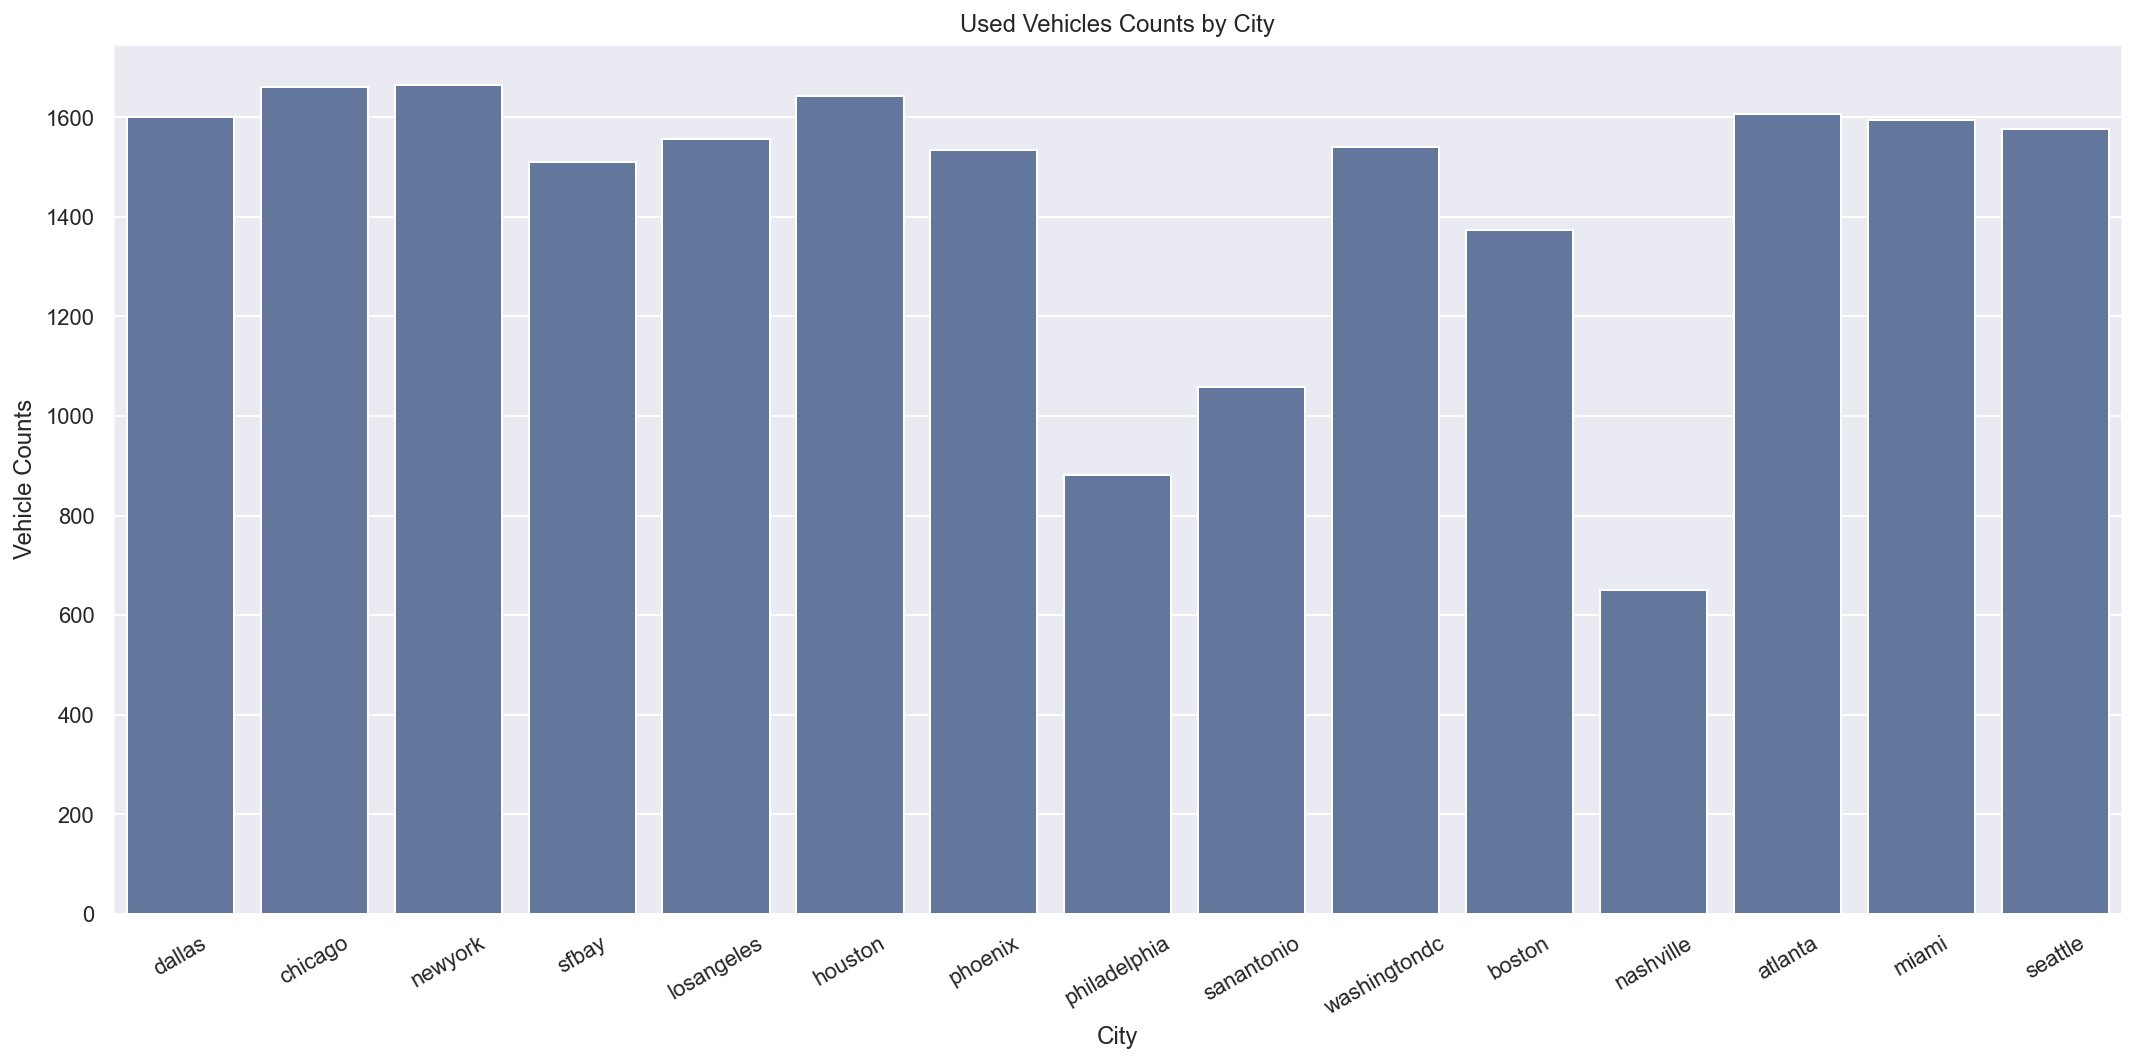

In [12]:
sns.set(rc = {'figure.figsize':(18,8)})
ax = sns.countplot(x="city", data=craiglist, color='#5975a4')
ax.tick_params(axis='x', rotation=30)
ax.set_xlabel("City");
ax.set_ylabel("Vehicle Counts");
ax.set_title("Used Vehicles Counts by City");

It seems like majority of the cities have more than 1500 used car listings with the exception of Boston, San Antonio while Philadelphia and Nashville only have lesser than 1,000 postings.

In [13]:
# Identify the range of data on the carlisting
print(craiglist["date time"].min(),craiglist["date time"].max())

2022-04-13 05;23 2022-05-12 07;46


The range of the used car listing is from 13th April 2022 up until 12th May 2022, across the span of a month.

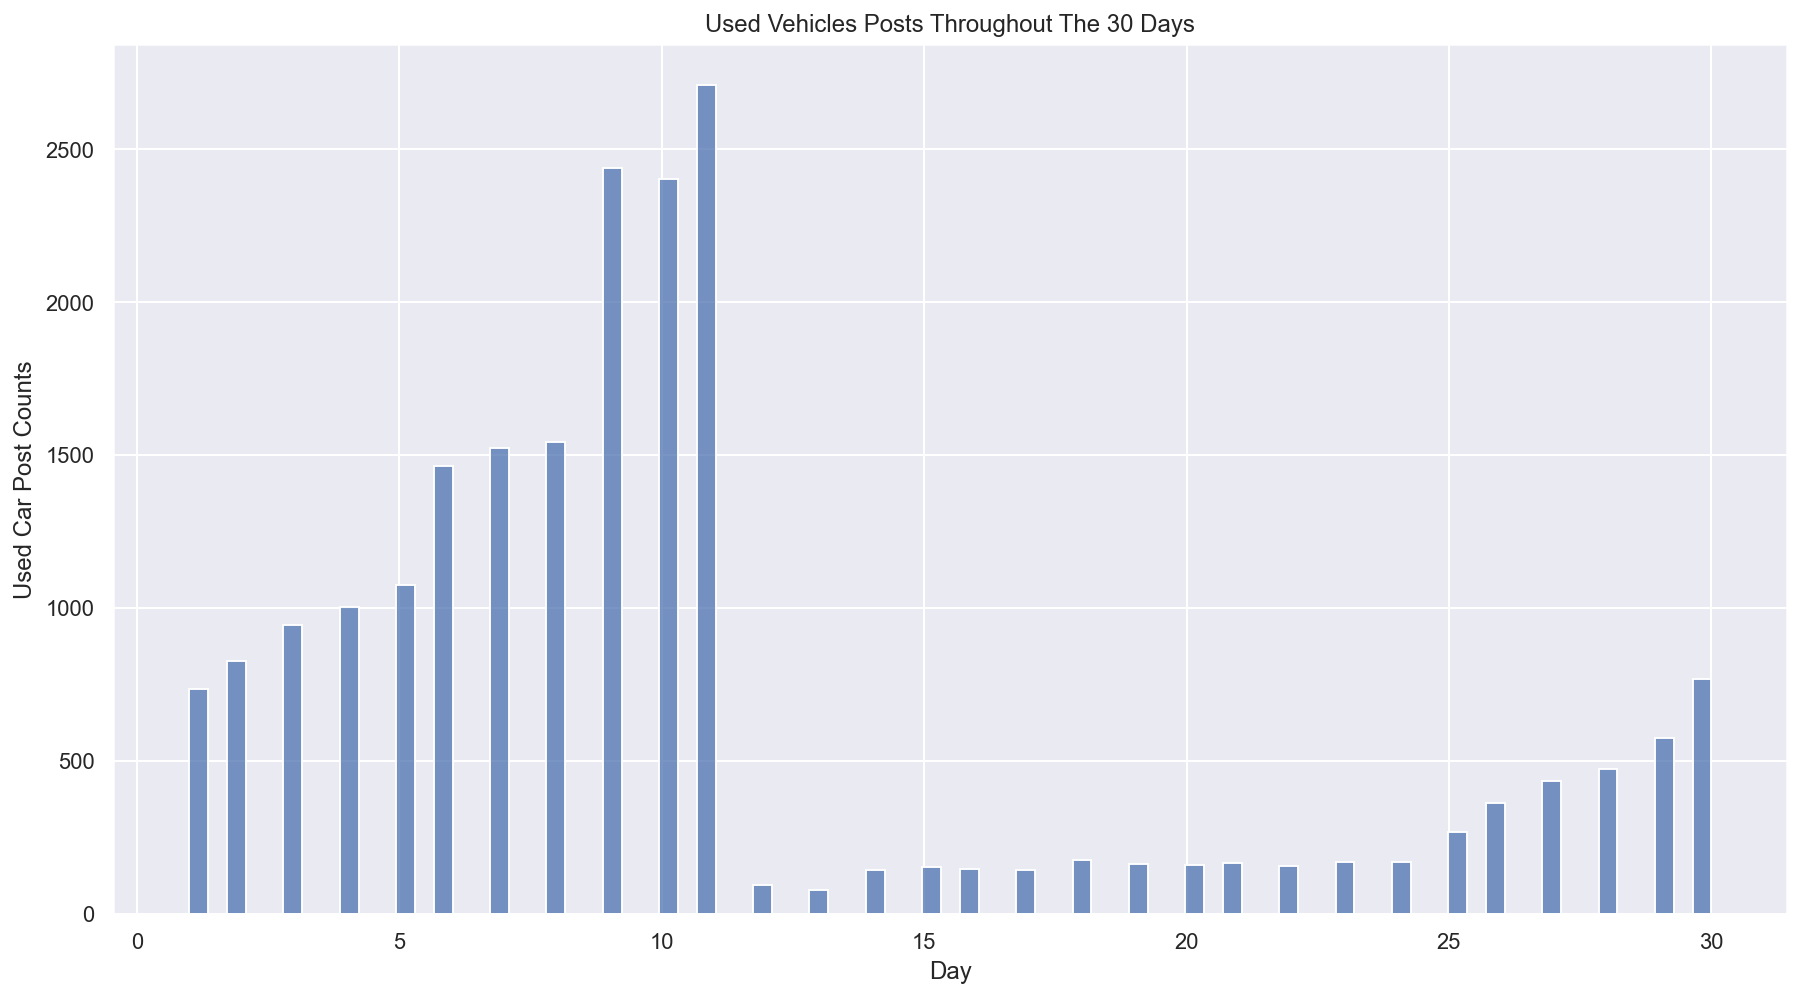

In [14]:
# Subsetting dataset for EDA
EDA = pd.DataFrame()
EDA["day"] = pd.DatetimeIndex(craiglist["date time"].str[:10]).day

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.histplot(x="day", data=EDA)

ax.set_title("Used Vehicles Posts Throughout The 30 Days");
ax.set_xlabel("Day");
ax.set_ylabel("Used Car Post Counts");

We can see here that the number of posts per day peaks on the 9th - 11th day (22 - 24 April 2022) which are Friday - Sunday. However, the number of posts drops dramatically after those dates.

In [15]:
# Display the average price of used car listing based on cities
craiglist[["city","price"]].groupby(by=["city"]).mean().round(2).sort_values("price",ascending=False)

,price
city,
washingtondc,21591.87
newyork,20816.55
phoenix,19071.58
losangeles,18589.29
dallas,17528.53
sfbay,16778.99
miami,16587.26
chicago,16362.90
seattle,16125.17


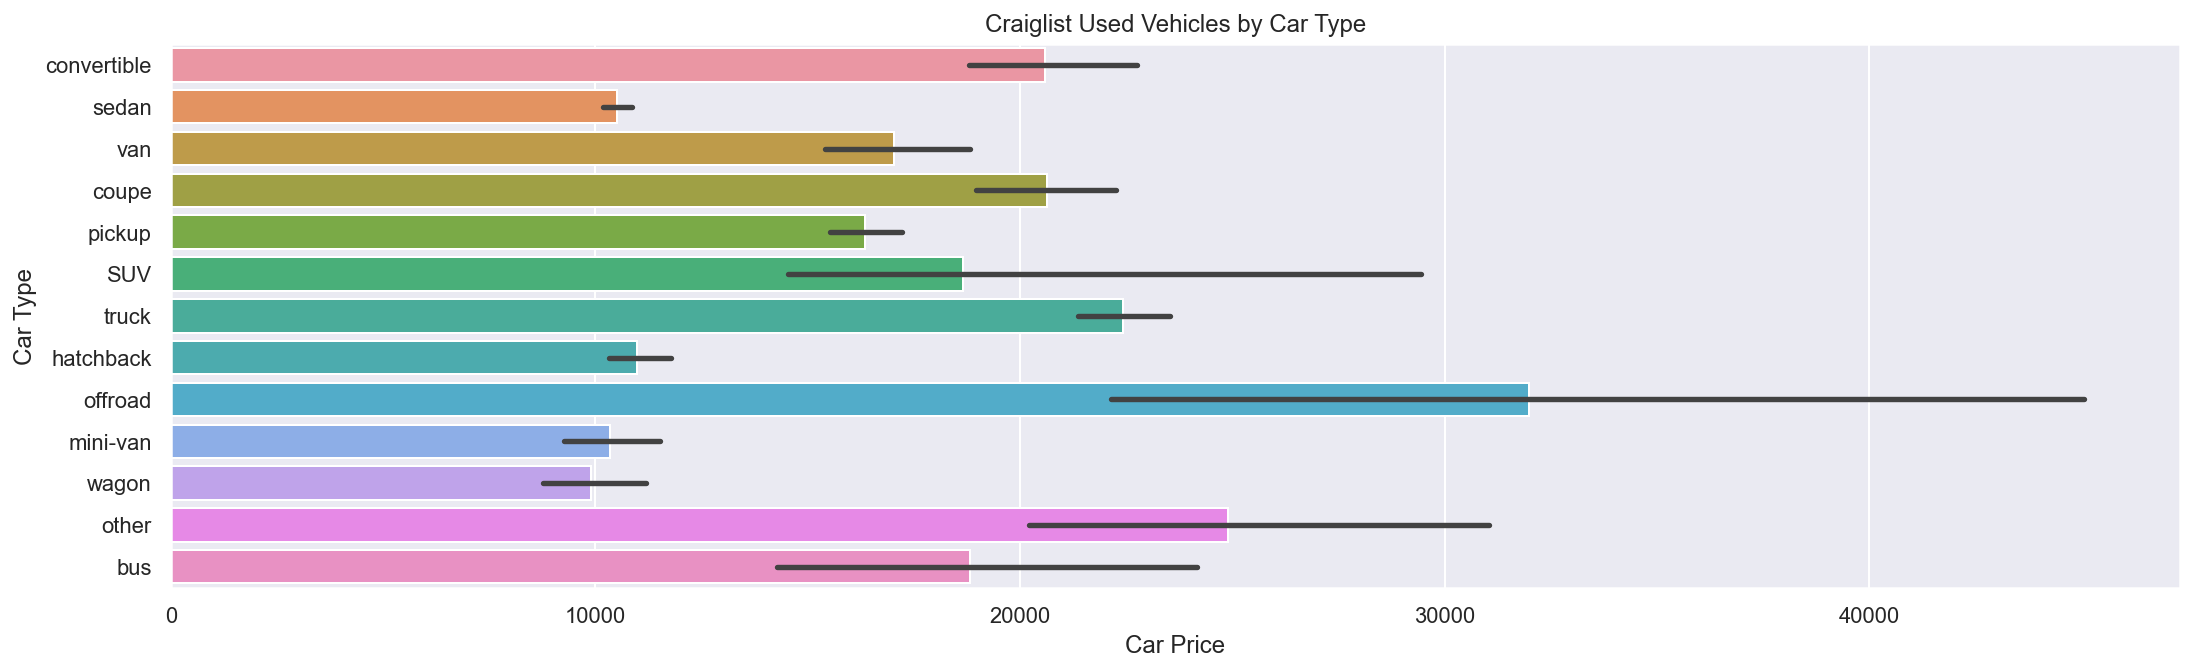

In [16]:
# Plot another plot for price against car type
fig = plt.subplots(1,1,figsize=(18,5))

ax = sns.barplot(x="price", y="type", data=craiglist)
ax.set_title("Craiglist Used Vehicles by Car Type");
ax.set_xlabel("Car Price");
ax.set_ylabel("Car Type");

It is observed that "Offroad" type has the highest selling prices followed by "other" and "truck". 

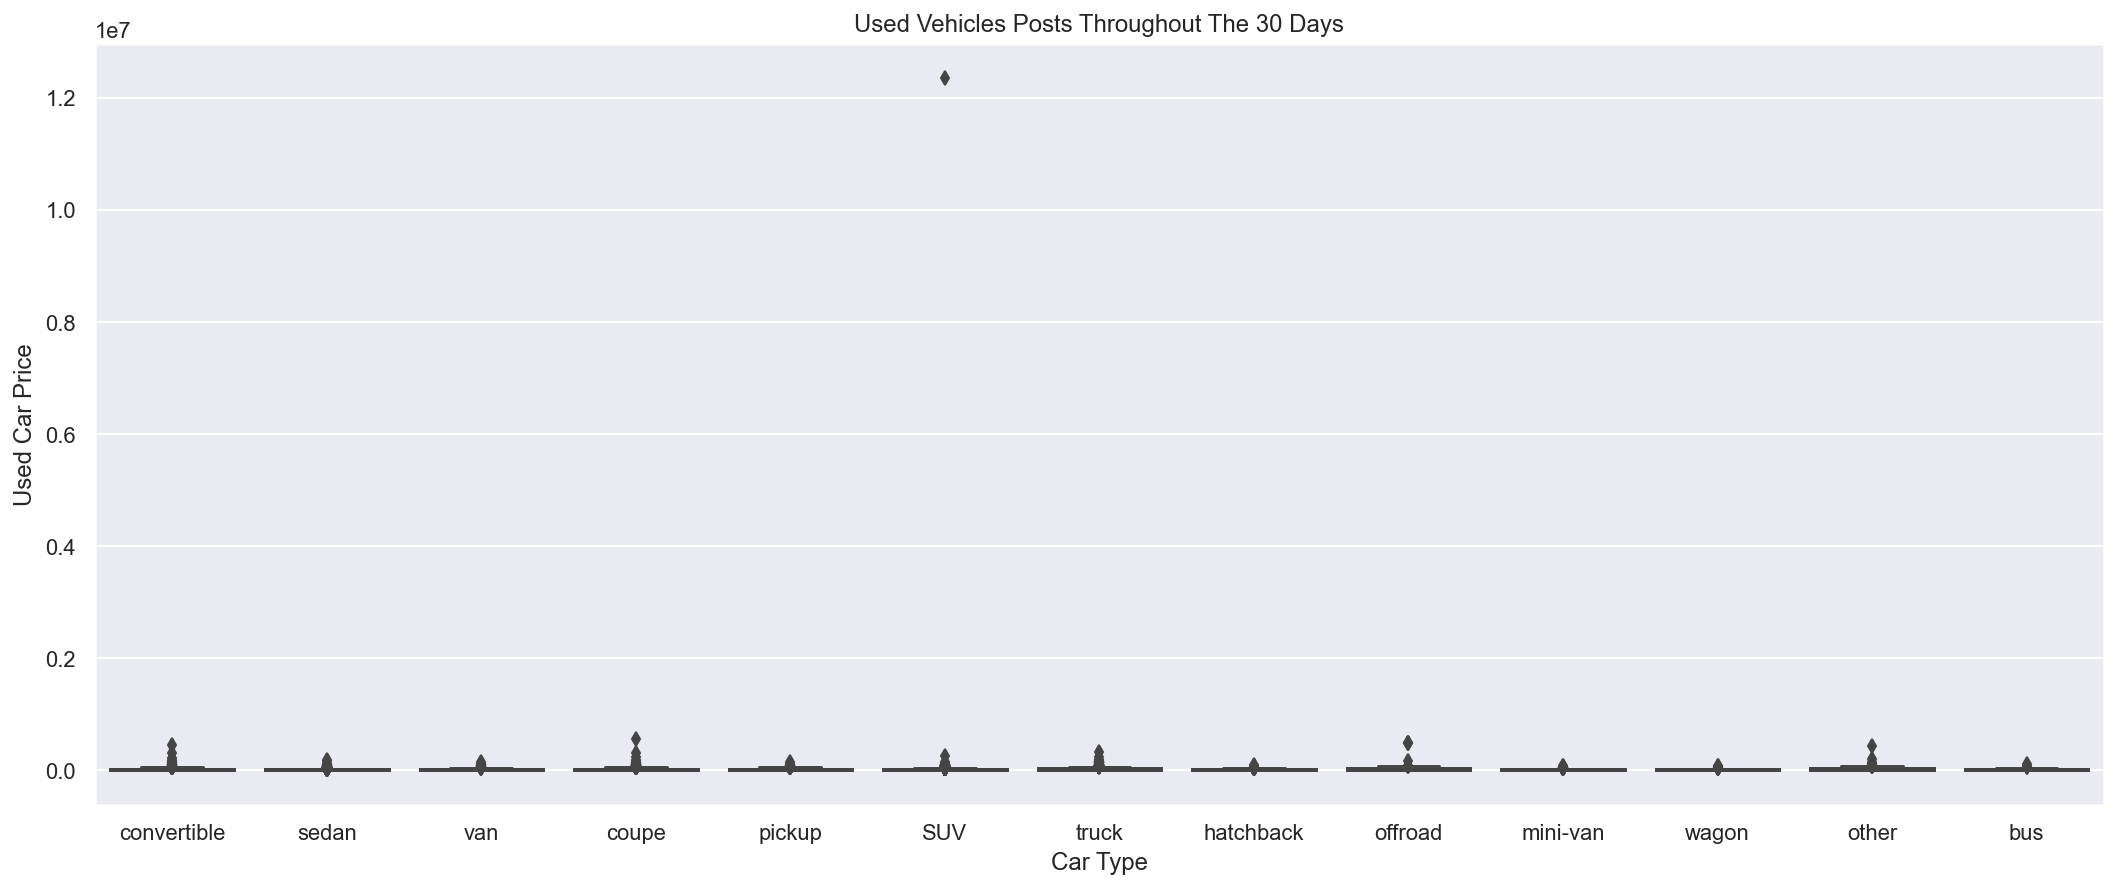

In [17]:
# Plot boxplot for price
plt.subplots(1,1,figsize=(18,7))

ax = sns.boxplot(x="type", y="price", data=craiglist)

ax.set_title("Used Vehicles Posts Throughout The 30 Days");
ax.set_xlabel("Car Type");
ax.set_ylabel("Used Car Price");

There seem to be an extreme outlier on SUV price which we might need to remove later on in the data cleaning process.

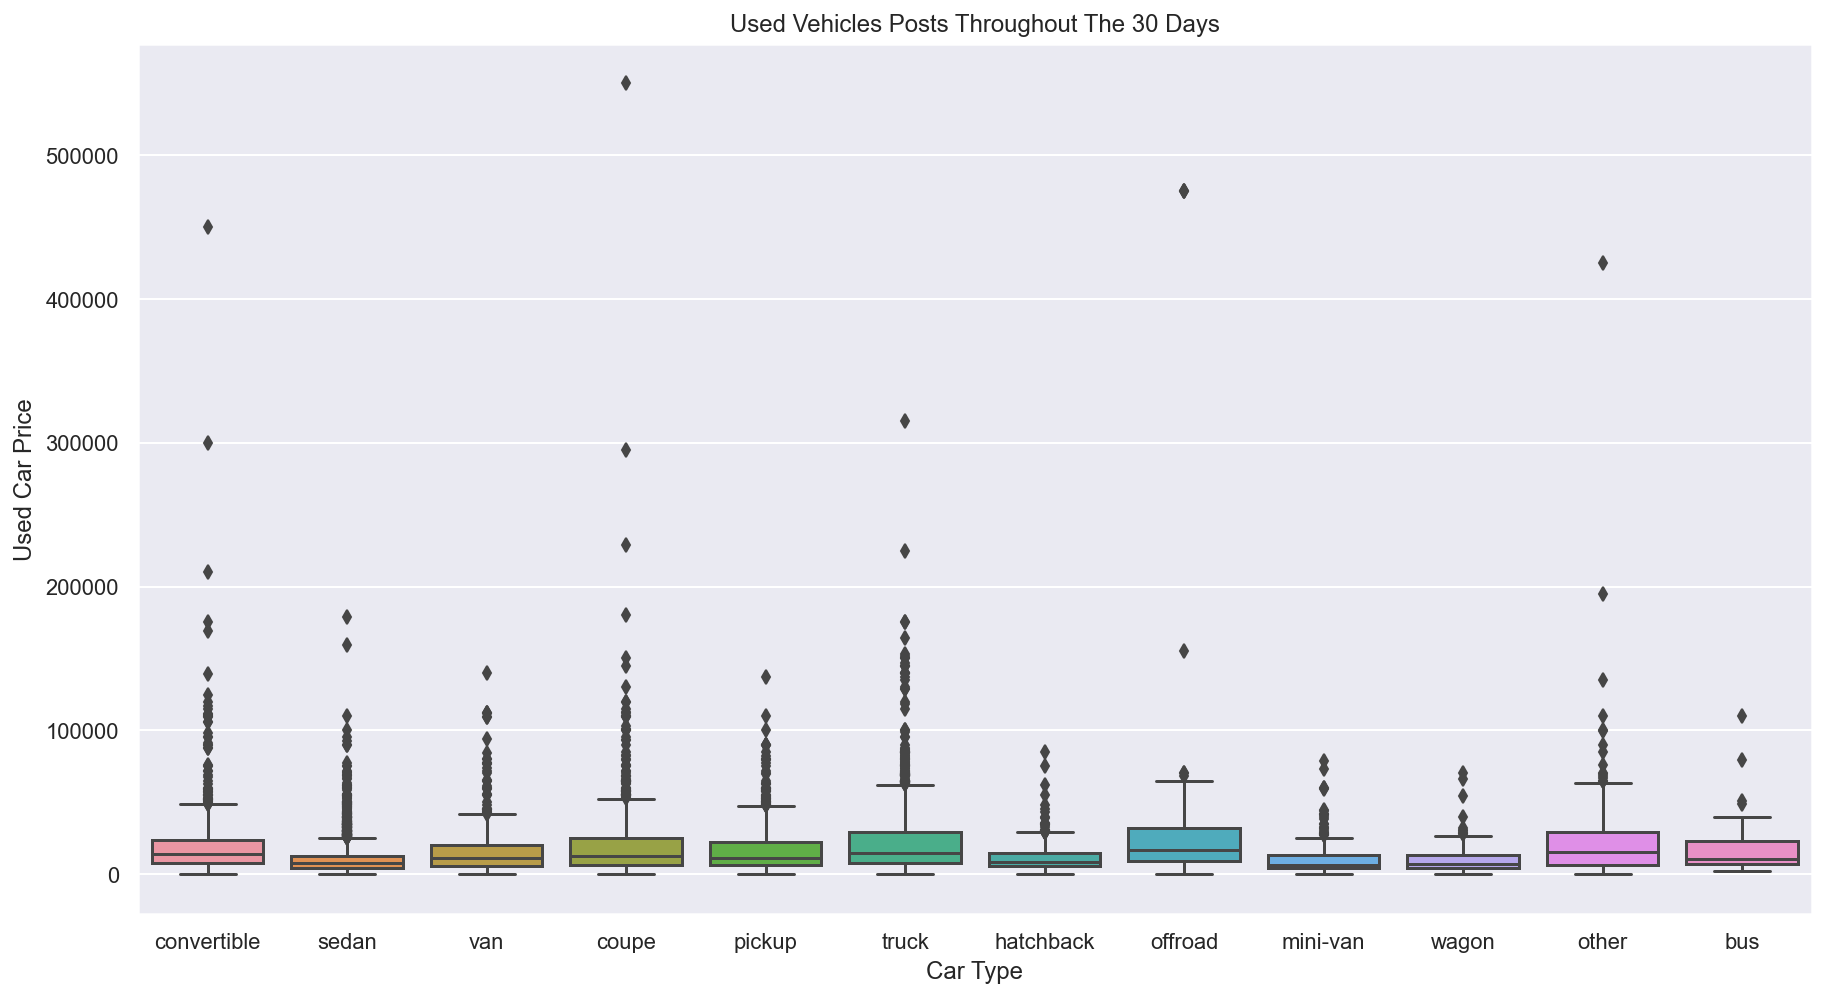

In [18]:
# Plot boxplot for price without SUV
sns.set(rc = {'figure.figsize':(15,8)})


craiglist_copy = craiglist.copy()
craiglist_copy = craiglist_copy[craiglist_copy.type != "SUV"]

ax = sns.boxplot(x="type", y="price", data=craiglist_copy)

ax.set_title("Used Vehicles Posts Throughout The 30 Days");
ax.set_xlabel("Car Type");
ax.set_ylabel("Used Car Price");

In [19]:
# craiglist.type.unique()

In [20]:
craiglist[["price","type"]].groupby("type").max()

,price
type,
SUV,12345678
bus,110000
convertible,450000
coupe,550000
hatchback,84850
mini-van,78869
offroad,475000
other,425000
pickup,137000


It seems like the one of the value of the SUV listing might be inputted with incorrect data and we will remove that at the data cleaning part

In [21]:
pd.DataFrame(craiglist["year make model"].astype(str).str[:4].value_counts().sort_values(ascending=False).head())

,year make model
2008,1193
2007,1193
2013,1185
2006,1102
2012,1076


It turns out that most of the cars that were made between 2006 and 2013 had the most used car postings in Craiglist. . The mode age of a car on Craigslist is around 12 years old but I wonder which vehicle brands dominate these ads.

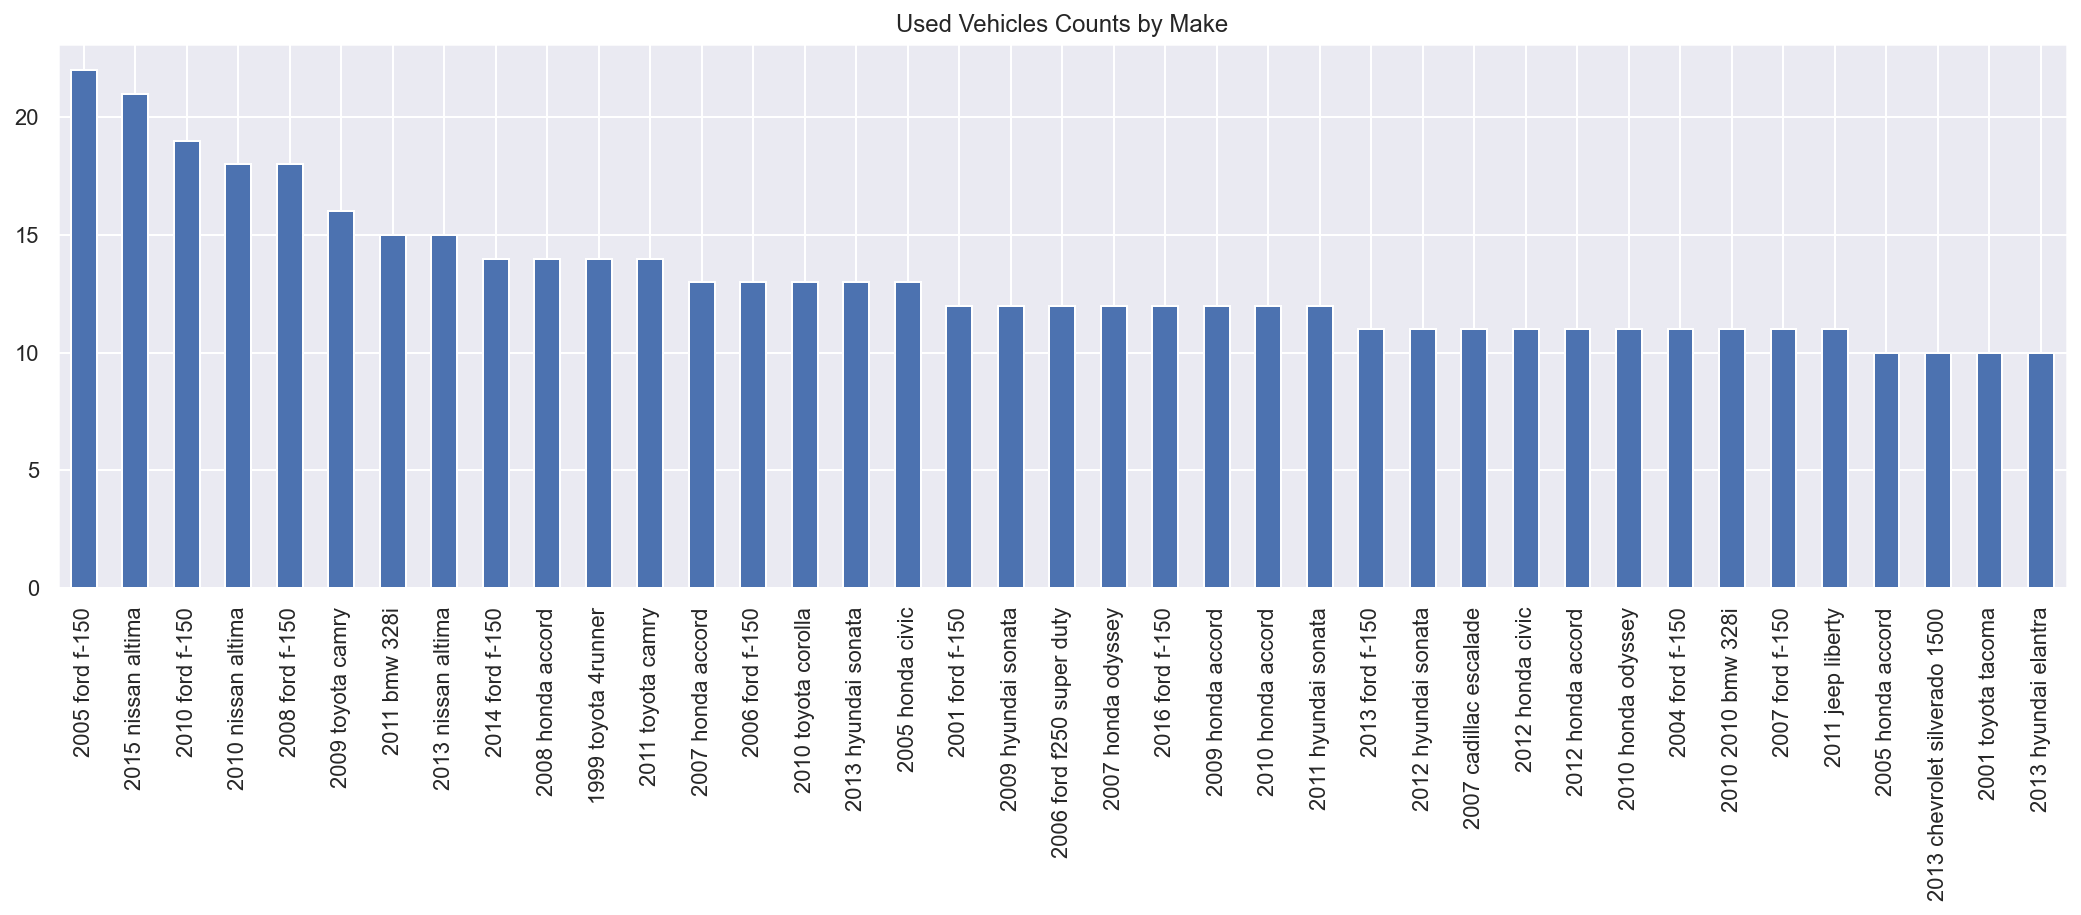

In [22]:
# plot most popular brands
fig, ax = plt.subplots(1,1,figsize=(18,5))
ax = craiglist["year make model"].value_counts(sort = True)[:39]\
               .plot.bar(title='Used Vehicles Counts by Make')

In [23]:
# Number of job postings for Honda, Ford and Toyota
print(craiglist["year make model"].str.contains("honda|ford|toyota").sum()/len(craiglist))


0.22069447681193194


Ford, Nissan and Toyota seems to be the more popular car make/brands which makes up of 22% of the data. There seem to have a good amount of japanese car make in the used car postings.


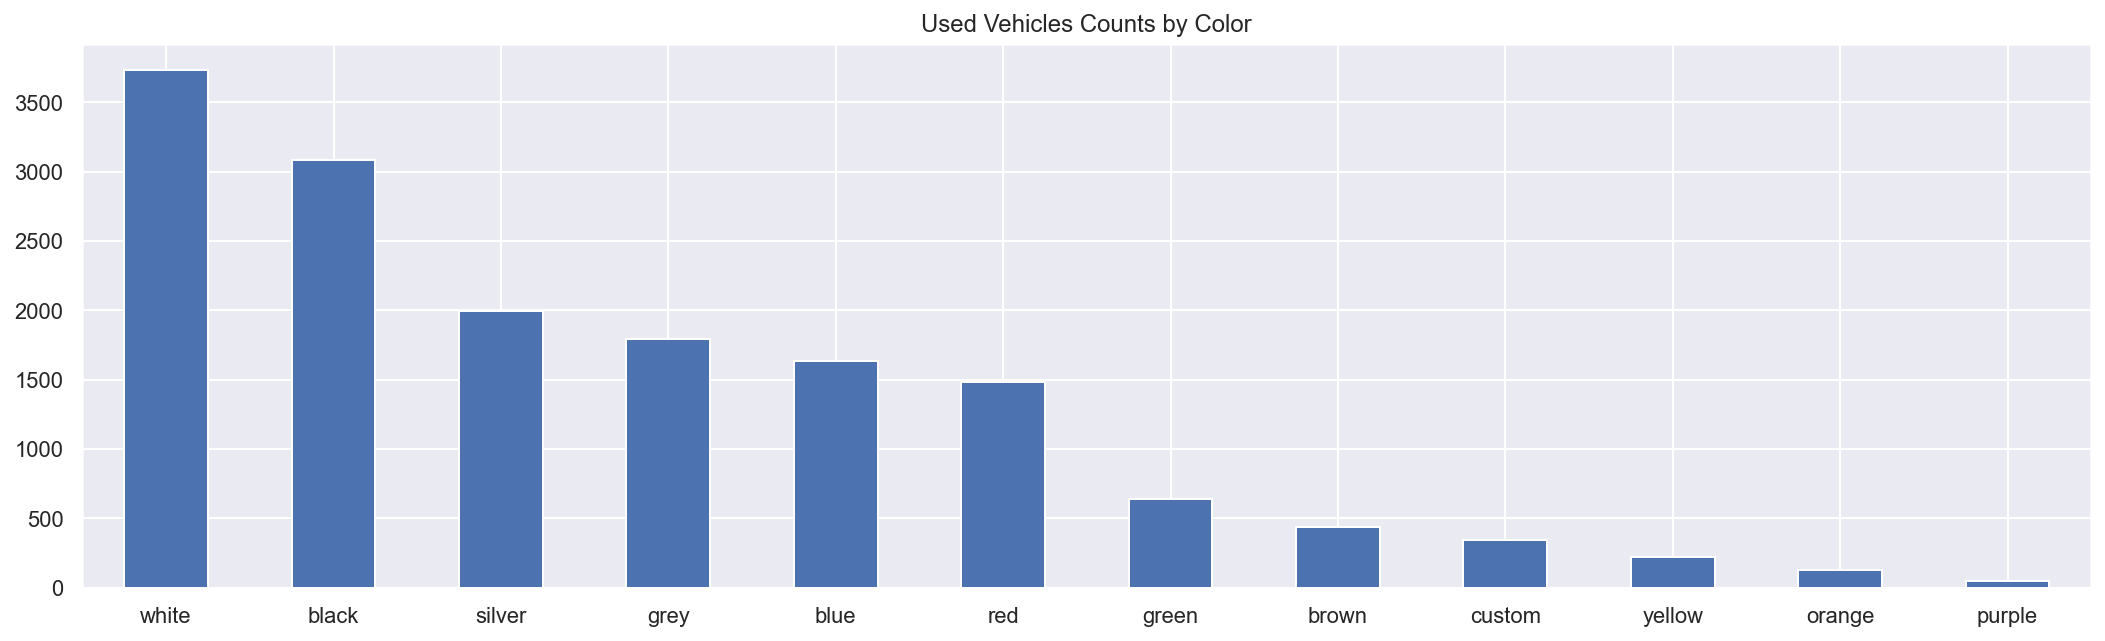

In [24]:
# plot most popular colors
fig, ax = plt.subplots(1,1,figsize=(18,5))
fig = craiglist[craiglist["paint color"].notna()]["paint color"]\
       .value_counts(sort = True).plot.bar(title='Used Vehicles Counts by Color')
fig = plt.xticks(rotation=0)

In [25]:
craiglist["paint color"].value_counts()

white     3733
black     3084
silver    1996
grey      1793
blue      1636
red       1479
green      639
brown      438
custom     341
yellow     222
orange     128
purple      51
Name: paint color, dtype: int64

The color "white" is the most popular followed by "black" and "silver". The top 3 color has a total 8,813 postings over 15,540 posts which accounts for more than 50% of the postings.


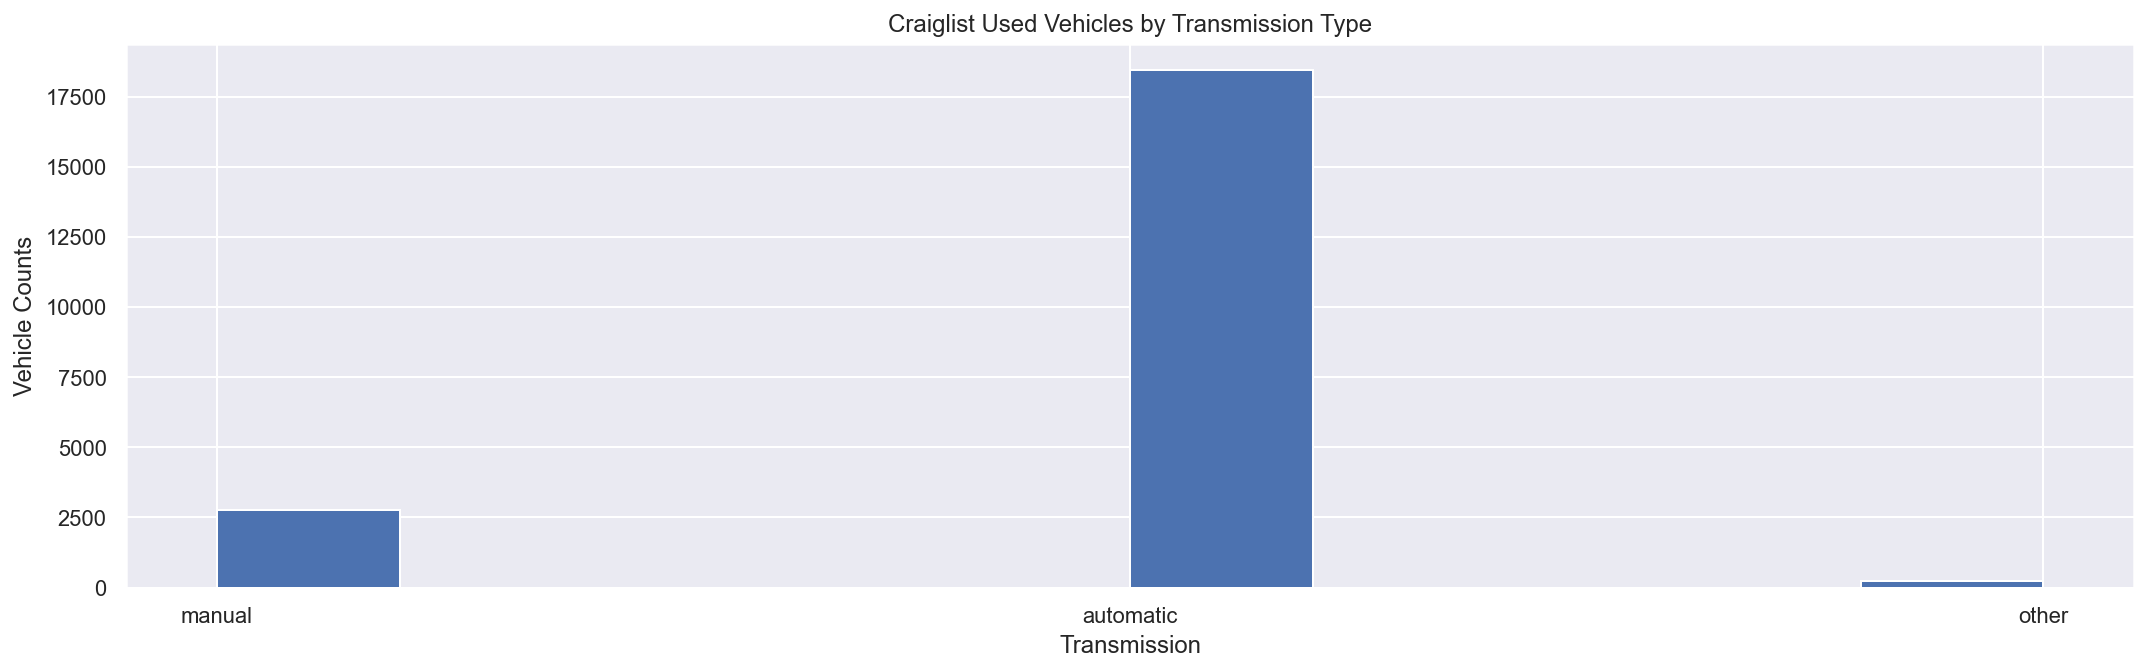

In [26]:
# Plot transmission
fig, ax = plt.subplots(1,1,figsize=(18,5))

# plot with histogram
fig = ax.hist(craiglist["transmission"])

# set labels and title
fig = ax.set_title("Craiglist Used Vehicles by Transmission Type")
fig = ax.set_xlabel("Transmission")
fig = ax.set_ylabel("Vehicle Counts")

In [27]:
craiglist["transmission"].value_counts()

automatic    18456
manual        2775
other          224
Name: transmission, dtype: int64

Most of the used car posting is with Automatic transmission which is more than 86% of the total used car postings in Craiglist

## Data Cleaning

* Drop VIN variable and other variables
* Deal with missing values
* Remove outlier from SUV
* Change year make model to year, brand, model, variant

### Dropping Columns

In [28]:
# Drop VIN column as it has more than 80% missing values
craiglist = craiglist.drop(columns=['VIN'])

In [29]:
# Drop Column1 and pID as it does not affect the class variable
craiglist = craiglist.drop(columns=['city', 'condition', 'cylinders', 'date time', 'drive', 'lat', 
                                    'long', 'post_body', 'size', 'title status', 'type', 'pID', 'Column1'])

In [30]:
# Drop 'year make model' as it is a duplicate column
craiglist = craiglist.drop(columns=['year make model'])

In [31]:
craiglist.head()

,fuel,odometer,paint color,price,transmission,year_c make model
0,gas,111111,NaN,200000,manual,1970 plymouth road runner
1,gas,90000,white,20000,automatic,2002 Lexus SC430
2,gas,160600,grey,11500,automatic,2013 Honda Civic sedan
3,gas,199000,white,3300,automatic,1995 ford van
4,gas,107292,silver,7000,automatic,2012 VW Jetta


### Splitting 'year_c make model'

In [32]:
craiglist1 = craiglist['year_c make model'].str.split(' ', n=3, expand=True)

In [33]:
craiglist = craiglist.join(craiglist1)

In [34]:
craiglist.head(10)

,fuel,odometer,paint color,price,transmission,year_c make model,0,1,2,3
0,gas,111111,NaN,200000,manual,1970 plymouth road runner,1970,plymouth,road,runner
1,gas,90000,white,20000,automatic,2002 Lexus SC430,2002,Lexus,SC430,None
2,gas,160600,grey,11500,automatic,2013 Honda Civic sedan,2013,Honda,Civic,sedan
3,gas,199000,white,3300,automatic,1995 ford van,1995,ford,van,None
4,gas,107292,silver,7000,automatic,2012 VW Jetta,2012,VW,Jetta,None
5,gas,80245,silver,11500,manual,2015 chevy camaro,2015,chevy,camaro,None
6,gas,50280,black,31995,automatic,2015 chevrolet silverado 1500 lt 4x4,2015,chevrolet,silverado,1500 lt 4x4
7,gas,176000,white,3900,automatic,2000 lexus es300,2000,lexus,es300,None
8,gas,165000,NaN,8500,automatic,2005 bmw 325ci convertible,2005,bmw,325ci,convertible
9,gas,55000,NaN,18500,automatic,2017 toyota rav4,2017,toyota,rav4,None


In [35]:
craiglist.rename(columns={0: 'year', 1: 'brand', 2: 'model', 3: 'variant'}, inplace=True)

In [36]:
craiglist.head(10)

,fuel,odometer,paint color,price,transmission,year_c make model,year,brand,model,variant
0,gas,111111,NaN,200000,manual,1970 plymouth road runner,1970,plymouth,road,runner
1,gas,90000,white,20000,automatic,2002 Lexus SC430,2002,Lexus,SC430,None
2,gas,160600,grey,11500,automatic,2013 Honda Civic sedan,2013,Honda,Civic,sedan
3,gas,199000,white,3300,automatic,1995 ford van,1995,ford,van,None
4,gas,107292,silver,7000,automatic,2012 VW Jetta,2012,VW,Jetta,None
5,gas,80245,silver,11500,manual,2015 chevy camaro,2015,chevy,camaro,None
6,gas,50280,black,31995,automatic,2015 chevrolet silverado 1500 lt 4x4,2015,chevrolet,silverado,1500 lt 4x4
7,gas,176000,white,3900,automatic,2000 lexus es300,2000,lexus,es300,None
8,gas,165000,NaN,8500,automatic,2005 bmw 325ci convertible,2005,bmw,325ci,convertible
9,gas,55000,NaN,18500,automatic,2017 toyota rav4,2017,toyota,rav4,None


In [37]:
# Drop 'year_c make model' after splitting
craiglist = craiglist.drop(columns=['year_c make model'])

In [38]:
craiglist.head(10)

,fuel,odometer,paint color,price,transmission,year,brand,model,variant
0,gas,111111,NaN,200000,manual,1970,plymouth,road,runner
1,gas,90000,white,20000,automatic,2002,Lexus,SC430,None
2,gas,160600,grey,11500,automatic,2013,Honda,Civic,sedan
3,gas,199000,white,3300,automatic,1995,ford,van,None
4,gas,107292,silver,7000,automatic,2012,VW,Jetta,None
5,gas,80245,silver,11500,manual,2015,chevy,camaro,None
6,gas,50280,black,31995,automatic,2015,chevrolet,silverado,1500 lt 4x4
7,gas,176000,white,3900,automatic,2000,lexus,es300,None
8,gas,165000,NaN,8500,automatic,2005,bmw,325ci,convertible
9,gas,55000,NaN,18500,automatic,2017,toyota,rav4,None


### Replacing 'other' in transmission with mode

In [39]:
craiglist["transmission"].value_counts()

automatic    18456
manual        2775
other          224
Name: transmission, dtype: int64

In [40]:
craiglist['transmission'] = craiglist['transmission'].str.replace('other', craiglist['transmission'].mode()[0])

In [41]:
craiglist["transmission"].value_counts()

automatic    18680
manual        2775
Name: transmission, dtype: int64

### Drop SUV Outlier

In [42]:
print(np.where(craiglist['price']>12000000))

(array([13800]),)


In [43]:
#Viewing outlier row
craiglist.iloc[[13800]]

,fuel,odometer,paint color,price,transmission,year,brand,model,variant
13800,gas,67000,green,12345678,automatic,1967,Suburban,None,None


In [44]:
# Drop outlier
craiglist = craiglist.drop([13800])

In [45]:
print(np.where(craiglist['price']>12000000))

(array([], dtype=int64),)


### Drop rows with more than 2 missing values

In [46]:
craiglist.shape

(21454, 9)

In [47]:
# Drop rows that contain less than 7 non-missing values
craiglist = craiglist.dropna(thresh=7)

In [48]:
# Shape after dropping rows with more than 2 missing values
craiglist.shape

(21063, 9)

### Imputing missing values with 'unknown'

In [49]:
percent_missing = craiglist.isnull().sum() * 100 / len(craiglist)
missing_value_df = pd.DataFrame({'Missing Values': craiglist.isna().sum(),
                                 'Percentage': round(percent_missing, 2)})
missing_value_df

,Missing Values,Percentage
fuel,0,0.00
odometer,0,0.00
paint color,5546,26.33
price,0,0.00
transmission,0,0.00
year,0,0.00
brand,0,0.00
model,407,1.93
variant,11384,54.05


In [50]:
craiglist['paint color'] = craiglist['paint color'].fillna("Unknown")
craiglist['model'] = craiglist['model'].fillna("Unknown")
craiglist['variant'] = craiglist['variant'].fillna("Unknown")

In [51]:
# Check missing values
percent_missing = craiglist.isnull().sum() * 100 / len(craiglist)
missing_value_df = pd.DataFrame({'Missing Values': craiglist.isna().sum(),
                                 'Percentage': round(percent_missing, 2)})
missing_value_df

,Missing Values,Percentage
fuel,0,0.0
odometer,0,0.0
paint color,0,0.0
price,0,0.0
transmission,0,0.0
year,0,0.0
brand,0,0.0
model,0,0.0
variant,0,0.0


The craiglist dataset now has 0 missing values

### Convert Brand, Model and Variant to lowercase

Certain values in brand, model and variant have the same values but in different cases. For example, in brand, there are some values with 'Toyota' and some with 'toyota'. Since Python is case sensitive it will intepret this as two different brands. Hence it will all be changed to lowercase.

In [52]:
craiglist['brand'] = craiglist['brand'].str.lower()
craiglist['model'] = craiglist['model'].str.lower()
craiglist['variant'] = craiglist['variant'].str.lower()

In [53]:
craiglist.head(50)

,fuel,odometer,paint color,price,transmission,year,brand,model,variant
0,gas,111111,Unknown,200000,manual,1970,plymouth,road,runner
1,gas,90000,white,20000,automatic,2002,lexus,sc430,unknown
2,gas,160600,grey,11500,automatic,2013,honda,civic,sedan
3,gas,199000,white,3300,automatic,1995,ford,van,unknown
4,gas,107292,silver,7000,automatic,2012,vw,jetta,unknown
5,gas,80245,silver,11500,manual,2015,chevy,camaro,unknown
6,gas,50280,black,31995,automatic,2015,chevrolet,silverado,1500 lt 4x4
7,gas,176000,white,3900,automatic,2000,lexus,es300,unknown
8,gas,165000,Unknown,8500,automatic,2005,bmw,325ci,convertible
9,gas,55000,Unknown,18500,automatic,2017,toyota,rav4,unknown


### Save data frame as csv

In [54]:
craiglist.to_csv('craiglist_clean.csv', index=False)